In [2]:
import pandas as pd
from matplotlib import pyplot
from config import TICKERS
from Query import Query
print(TICKERS)

name = "5_periods"
length = "25"
highs = {}

def get_highest_avg_corr(base_ticker):
    highs = Query(base_ticker).ticker_highest_corr(name, length)
    tickers = highs.target_ticker.unique()
    comparison = Query(base_ticker).tickers_comparison(tickers, name, length)
    correlation_means = comparison.mean().sort_values(ascending=False)
    return correlation_means.index[0], correlation_means[0]
    

for ticker in TICKERS:
    k,v = get_highest_avg_corr(ticker)
    highs[ticker] = {'ticker': k, 'avg_correlation': v}
df = pd.DataFrame(highs).transpose()
df

ModuleNotFoundError: No module named '__main__.correlations'; '__main__' is not a package

In [20]:
sorted = df.sort_values(by=['avg_correlation'], ascending=False)
base_ticker = sorted.index[0]
high_value = sorted.iloc[0].avg_correlation
target_ticker = sorted.iloc[0].ticker
print(base_ticker, target_ticker)
sorted


CC MSFT


avg_correlation ticker
CC            0.1636   MSFT
BAC           0.1112     CC
DB          0.104933    BAC
MSFT       0.0933333    BAC
AAPL       0.0874667    BAC
FB         0.0726667   AAPL

data/CC-5_periods-25len.csv


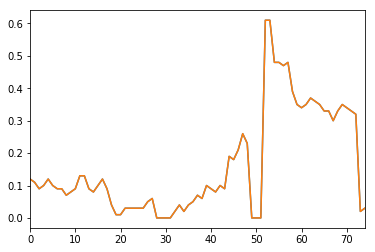

In [23]:
history = Query(base_ticker).ticker_history(target_ticker, name, length)
history.plot()
pyplot.show()